In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generating data and creating samples

Generating a dataset from uniform distribution between [0,100]. (Can be thought of as grades of 5000 students)

In [ ]:
#generate a dataset of 5000 samples of uniform distribution between 0 and 100
np.random.seed(0)
data = np.random.uniform(0,100,5000)

In [ ]:
#print the mean and variance of the data
print('Mean:', np.mean(data))
print('Variance:', np.var(data))

Mean: 49.69708929711079
Variance: 835.8593188494007


Creating a sample from the dataset

In [ ]:
#randomly pickup 10 points from the dataset
sample = np.random.choice(data, 10)

In [ ]:
print(sample.shape)
print(sample)
print(sample.mean())

(10,)
[39.11357121 74.30228925 13.4597309  29.08409067 79.37512497 80.51274852
 94.08649044 19.41942076 97.6459465  45.22212134]
57.22215345636514


What do you think the mean of the sample will be? Will it be the same as population mean? If not then what should we do to make the sample mean and population mean same?

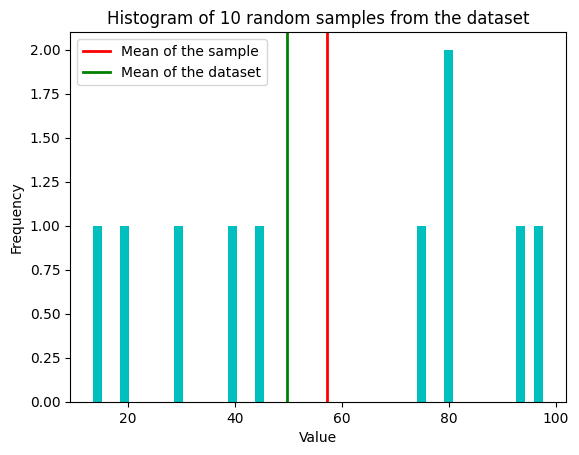

In [ ]:
#plot the sample of the dataset and color the points where mean of the sample is
plt.hist(sample, bins=50, color='c')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Histogram of 10 random samples from the dataset')
#make a vertical line at the mean of the sample
plt.axvline(sample.mean(), color='r', linestyle='solid', linewidth=2)
#plot the mean of the dataset
plt.axvline(data.mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(['Mean of the sample', 'Mean of the dataset'])


# Mean of samples

Mean of samples of same size

In [ ]:
### Do yourself for different sample sizes

Mean of samples of different sizes

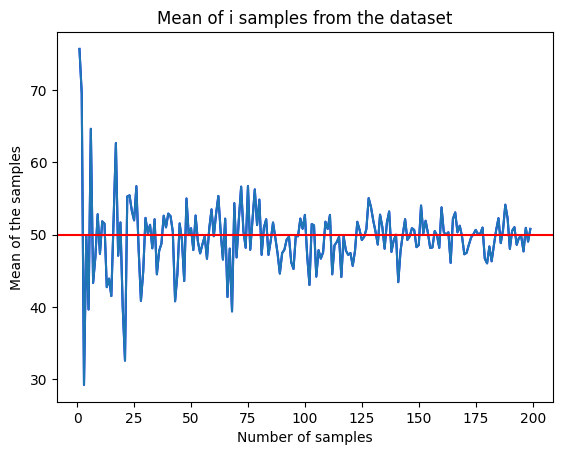

In [ ]:
np.random.seed(0)
#generate an array of numbers from 1 to 200
x = np.arange(1, 200)
#for i in range x, calculate the mean of i numbers randomly chosen from data
y = [np.random.choice(data, i).mean() for i in x]
plt.plot(x, y, color='b')
plt.xlabel('Number of samples')
plt.ylabel('Mean of the samples')
plt.title('Mean of i samples from the dataset')
#fit a mean line in orange
#create a horizontal line at 50
plt.plot(x, y)
plt.axhline(y=50, color='r', linestyle='-')
plt.show()


# Variance(Biased and Unbiased estimator)

What is the variance of the sample? What does the variance tell us about the population? What is the difference between unbiased variance and biased variance?


In [ ]:
print('Biased variance',sample.var())
print('Unbiased variance',sample.var(ddof=1))

Biased variance 892.5867716172737
Unbiased variance 991.7630795747486


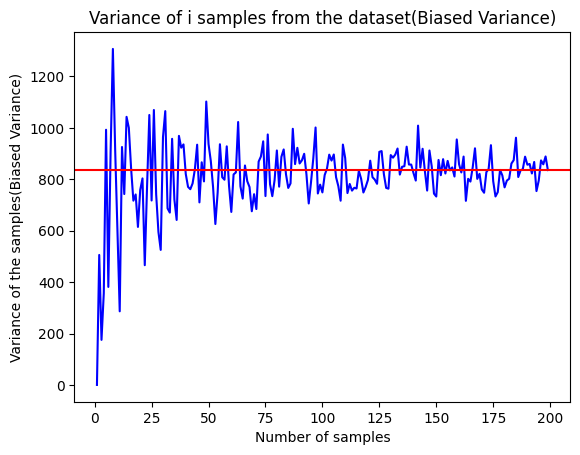

In [ ]:
np.random.seed(10)
#generate an array of numbers from 1 to 200
x = np.arange(1, 200)
#for i in range x, calculate the variance of i numbers randomly chosen from data
y = [np.random.choice(data, i).var() for i in x]
plt.plot(x, y, color='b')
plt.xlabel('Number of samples')
plt.ylabel('Variance of the samples(Biased Variance)')
plt.title('Variance of i samples from the dataset(Biased Variance)')
#fit a variance line in orange
#create a horizontal line at 800
plt.axhline(y=835, color='r', linestyle='-')
plt.show()

In [ ]:
#calculate the number of values in y less than 835
count = sum(i < 835 for i in y)
print('Number of values in y less than 835:', count)

Number of values in y less than 835: 111


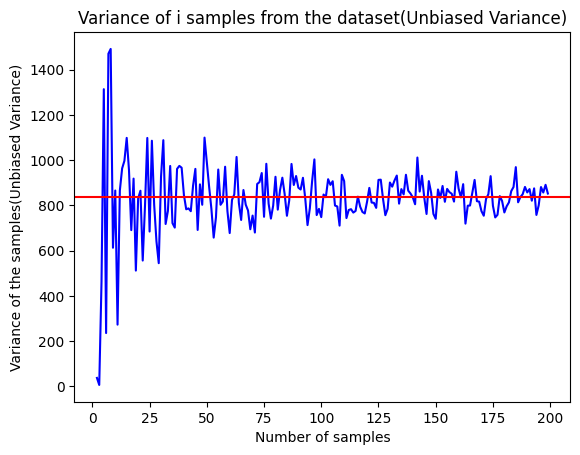

In [ ]:
np.random.seed(10)
#generate an array of numbers from 1 to 200
x = np.arange(2, 200)   #start from two because the unbiased variance is calculated using n-1
#for i in range x, calculate the unbiased variance of i numbers randomly chosen from data
y = [np.random.choice(data, i).var(ddof=1) for i in x]
plt.plot(x, y, color='b')
plt.xlabel('Number of samples')
plt.ylabel('Variance of the samples(Unbiased Variance)')
plt.title('Variance of i samples from the dataset(Unbiased Variance)')
#fit a variance line in orange
#create a horizontal line at 800
plt.axhline(y=835, color='r', linestyle='-')
plt.show()


In [ ]:
#calculate the number of values in y less than 835
count = sum(i < 835 for i in y)
print('Number of values in y less than 835:', count)

Number of values in y less than 835: 98


# Generating height, weight dataset and calculations on that

Plotting a sample

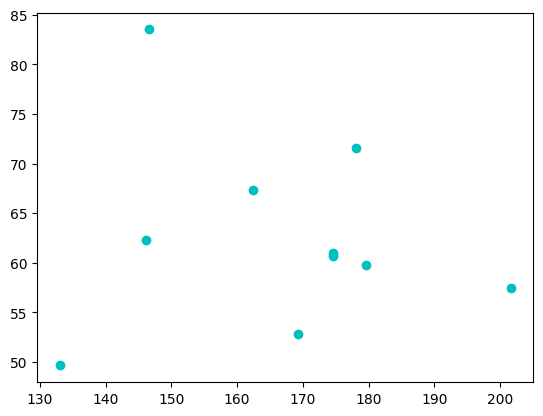

In [ ]:
#generate a dataset of 5000 samples of normal distribution with mean 165 and standard deviation 15
np.random.seed(0)
data_for_height = np.random.normal(165, 15, 5000)
#generate a dataset of 5000 samples of normal distribution with mean 65 and standard deviation 10
data_for_weight = np.random.normal(65, 10, 5000)
#generate random data samples for height and weight
height_sample = np.random.choice(data_for_height, 10)
weight_sample = np.random.choice(data_for_weight, 10)
#plot the sample of height and weight
plt.scatter(height_sample, weight_sample, color='c')

Seeing how our randomly generated plot is distributed(frequency plot)

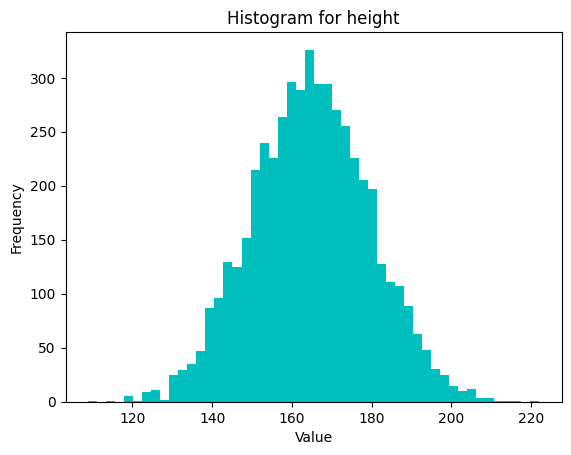

In [ ]:
#plot histogram of heights
plt.hist(data_for_height, bins=50, color='c')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Histogram for height')
plt.show()

Looking for outliers in the data of height

<Axes: >

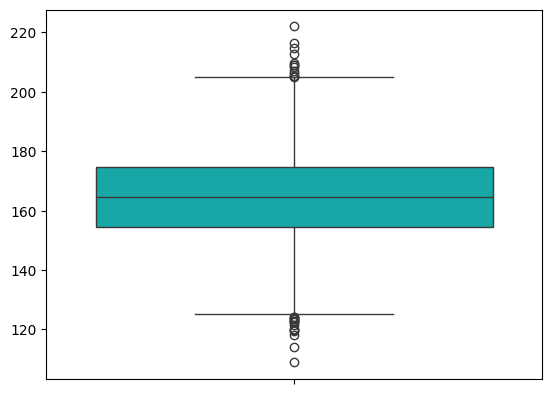

In [ ]:
#create a box plot to show the distribution of the height using seaborn
sns.boxplot(data_for_height, color='c')

Plotting  more samples to see how covariance varies.

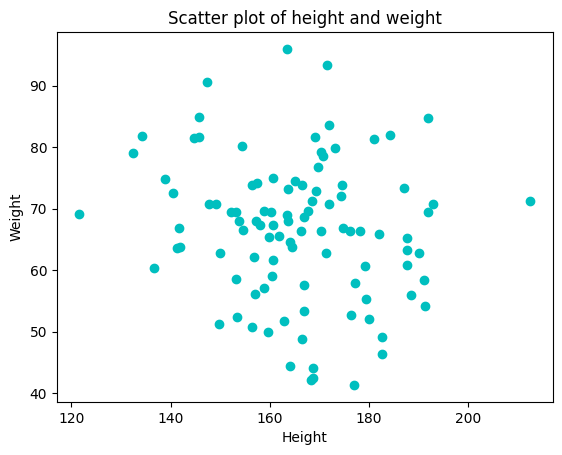

In [ ]:
#take random samples of data for height and weight equal to the sample size
sample_size = 100
height_sample = np.random.choice(data_for_height, sample_size)
weight_sample = np.random.choice(data_for_weight, sample_size)
#plot the sample of height and weight
plt.scatter(height_sample, weight_sample, color='c')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter plot of height and weight')
plt.show()

Actual correlation in data

In [ ]:
#calculate the correlation between height and weight sample calculated using pearson correlation
correlation = np.corrcoef(height_sample, weight_sample)
print('Correlation between height and weight sample is: ', correlation[0,1])

Correlation between height and weight sample is:  -0.15094587358137213


Take a sample of size 100 and look at it's covariance. (Repeat the process 100 times)

Correlation between height and weight is:  0.0014968374067276297


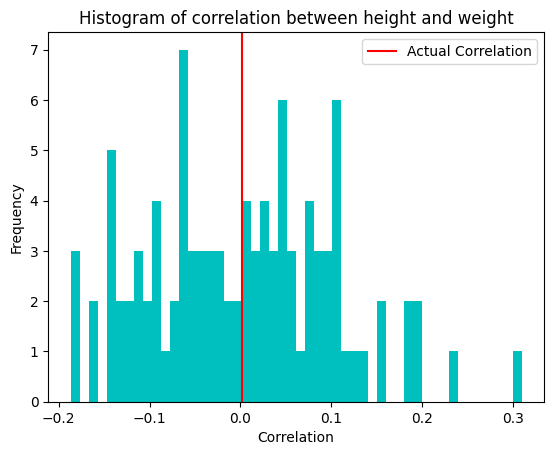

In [ ]:
#calculate the correlation of heights and weights using spearman correlation
correlation = np.corrcoef(data_for_height, data_for_weight)
print('Correlation between height and weight is: ', correlation[0,1])
correlation_data=correlation[0,1]
#calculate the correlation between height and weight sample calculated using spearman correlation for different sample size
np.random.seed(50)
sample_size = 100
correlation = []
for i in range(100):
    height_sample = np.random.choice(data_for_height, sample_size)
    weight_sample = np.random.choice(data_for_weight, sample_size)
    correlation.append(np.corrcoef(height_sample, weight_sample)[0,1])
#plot a vertical line at the value of correlation[0,1]
plt.axvline(x=correlation_data, color='r', linestyle='-')
plt.hist(correlation, bins=50, color='c')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Histogram of correlation between height and weight')
#label the red line as actual correlation using legend
#label the vertical line as actual correlation
# plt.text(correlation[0], 3, 'Actual Correlation', rotation=90)
plt.legend(['Actual Correlation'])

# Implications of central limit theorem

Generate a probability distribution

<BarContainer object of 5 artists>

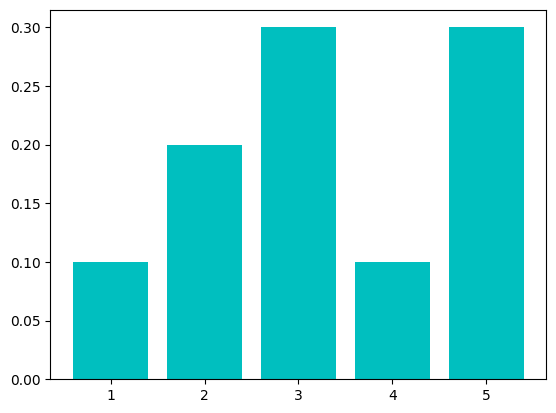

In [ ]:
#implications of central limit theorem
pr=[0.1, 0.2, 0.3, 0.1, 0.3]
#convert the list to an array
pr = np.array(pr)
#let X be a random variable with the given probability distribution such that x=1,2,3,4,5 with the given probabilities
X = np.arange(1,6)
plt.bar(X, pr, color='c')

Generate Y = X1 + X2 + X3 + X4 + X5 where each Xi comes from our distribution and see the probability distribution of Y.

(array([  1.,   0.,   2.,   0.,   0.,  10.,   0.,   0.,  15.,   0.,   0.,
         27.,   0.,  47.,   0.,   0.,  66.,   0.,   0.,  85.,   0.,   0.,
        120.,   0.,   0., 124.,   0., 136.,   0.,   0., 117.,   0.,   0.,
         91.,   0.,   0.,  74.,   0.,  43.,   0.,   0.,  22.,   0.,   0.,
         11.,   0.,   0.,   6.,   0.,   3.]),
 array([ 7.  ,  7.36,  7.72,  8.08,  8.44,  8.8 ,  9.16,  9.52,  9.88,
        10.24, 10.6 , 10.96, 11.32, 11.68, 12.04, 12.4 , 12.76, 13.12,
        13.48, 13.84, 14.2 , 14.56, 14.92, 15.28, 15.64, 16.  , 16.36,
        16.72, 17.08, 17.44, 17.8 , 18.16, 18.52, 18.88, 19.24, 19.6 ,
        19.96, 20.32, 20.68, 21.04, 21.4 , 21.76, 22.12, 22.48, 22.84,
        23.2 , 23.56, 23.92, 24.28, 24.64, 25.  ]),
 <BarContainer object of 50 artists>)

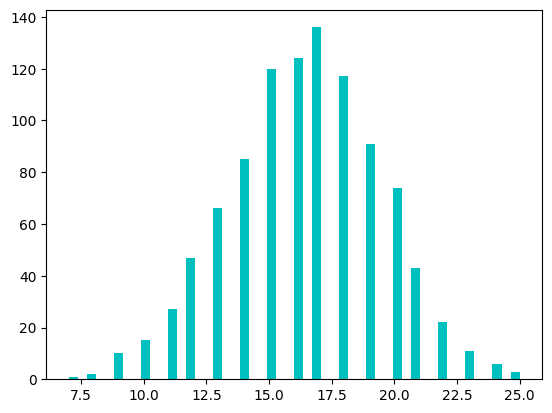

In [ ]:
#generate 1000 samples of 5 values each from the given probability distribution and sum the 5 values
np.random.seed(0)
samples = np.random.choice(X, size=(1000, 5), p=pr)
#Make an array with the sum of all rows of samples
samples.shape
#create an array which sums all rows in samples
#plot the samples with frequency of each value
sums = samples.sum(axis=1)
sums.shape
plt.hist(sums, bins=50, color='c')